In [20]:
import pandas as pd
import seaborn as see
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
hap_knn =  pd.read_csv("E:\ML project\heart.csv")
hap_knn.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#hap_knn.pop('oldpeak')
#hap_knn.pop('fbs')
hap_knn.pop('restecg')
#hap_knn.pop('cp')
#hap_knn.pop('sex')
#hap_knn.pop('caa')
#hap_knn.pop('slp')
#hap_knn.pop('thall')
#hap_knn.pop('exng')
hap_knn.pop('trtbps')
#hap_knn.pop('chol')
#hap_knn.pop('age')
hap_knn.pop('thalachh')
#hap_knn.head()

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalachh, Length: 303, dtype: int64

In [23]:
scaler =  MinMaxScaler()
hap_knn = scaler.fit_transform(hap_knn)
colomNames = ['age', 'sex', 'cp',  'chol',	'fbs',			'exng',	'oldpeak',	'slp',	'caa',	'thall', 'output']
hap_knn = pd.DataFrame(hap_knn, columns= colomNames)
hap_knn.set_index('age', inplace=True)
hap_knn.head()

,sex,cp,chol,fbs,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,
0.708333,1.0,1.000000,0.244292,1.0,0.0,0.370968,0.0,0.0,0.333333,1.0
0.166667,1.0,0.666667,0.283105,0.0,0.0,0.564516,0.0,0.0,0.666667,1.0
0.250000,0.0,0.333333,0.178082,0.0,0.0,0.225806,1.0,0.0,0.666667,1.0
0.562500,1.0,0.333333,0.251142,0.0,0.0,0.129032,1.0,0.0,0.666667,1.0
0.583333,0.0,0.000000,0.520548,0.0,1.0,0.096774,1.0,0.0,0.666667,1.0


In [24]:
hap_knn['output'].value_counts()

1.0    165
0.0    138
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

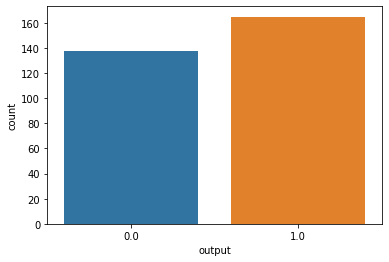

In [25]:
see.countplot(x='output', data = hap_knn)

In [26]:
x = hap_knn.drop('output', axis=1)
y = hap_knn['output']

In [27]:
x.head()

,sex,cp,chol,fbs,exng,oldpeak,slp,caa,thall
age,,,,,,,,,
0.708333,1.0,1.000000,0.244292,1.0,0.0,0.370968,0.0,0.0,0.333333
0.166667,1.0,0.666667,0.283105,0.0,0.0,0.564516,0.0,0.0,0.666667
0.250000,0.0,0.333333,0.178082,0.0,0.0,0.225806,1.0,0.0,0.666667
0.562500,1.0,0.333333,0.251142,0.0,0.0,0.129032,1.0,0.0,0.666667
0.583333,0.0,0.000000,0.520548,0.0,1.0,0.096774,1.0,0.0,0.666667


In [28]:
y.head()

age
0.708333    1.0
0.166667    1.0
0.250000    1.0
0.562500    1.0
0.583333    1.0
Name: output, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, stratify=y, random_state=23)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline

In [32]:
#hap_KHC = NeighborhoodComponentsAnalysis(random_state= 42)
hap_KNN = KNeighborsClassifier(n_neighbors=9, metric='minkowski', weights = 'distance', algorithm = 'ball_tree', leaf_size= 50, p=1)

In [33]:
#pipline = Pipeline([('nca', hap_KHC), ('knn', hap_KNN)])

In [34]:
hap_KNN.fit(x_train, y_train)
#pipline.fit(x_train, y_train)
#print(pipline.score(x_test, y_test))

KNeighborsClassifier(algorithm='ball_tree', leaf_size=50, n_neighbors=9, p=1,
                     weights='distance')

In [35]:
hap_KNN.score(x_test, y_test)

0.9347826086956522

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
pred = hap_KNN.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('F1-Score: ', f1_score(y_test, pred))


Accuracy:  0.9347826086956522
Recall:  0.96
Precision:  0.9230769230769231
F1-Score:  0.9411764705882353


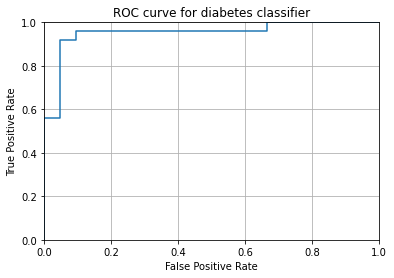

In [37]:
y_pred_prob = hap_KNN.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [38]:
print("AUC Score:",roc_auc_score(y_test, y_pred_prob))

AUC Score: 0.9523809523809523


<AxesSubplot:>

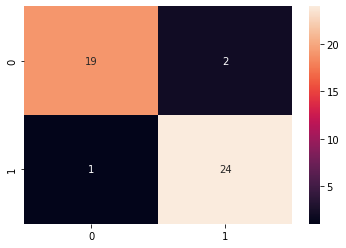

In [39]:
confusionM = confusion_matrix(y_test, pred)   
see.heatmap(confusionM, annot= True)  